In [7]:
import  numpy as np
X = np.load("X2.npy")
y = np.load("y2.npy")

In [ ]:
# tsai - Sequence prediction - A backbone deeplearning framework that works well

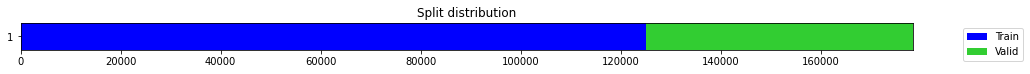

epoch,train_loss,valid_loss,accuracy,time
0,0.411737,0.460148,0.890238,01:06
1,0.281545,0.375926,0.892460,01:06
2,0.259980,0.361491,0.892516,01:06
3,0.210995,0.413762,0.861443,01:07
4,0.178485,0.403482,0.890238,01:06
5,0.153229,0.428362,0.879127,01:06
6,0.153201,0.426111,0.876643,01:07
7,0.143137,0.478595,0.890144,01:07
8,0.128473,0.474199,0.865047,01:06
9,0.116159,0.477079,0.878977,01:06


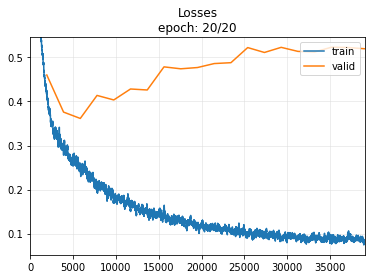

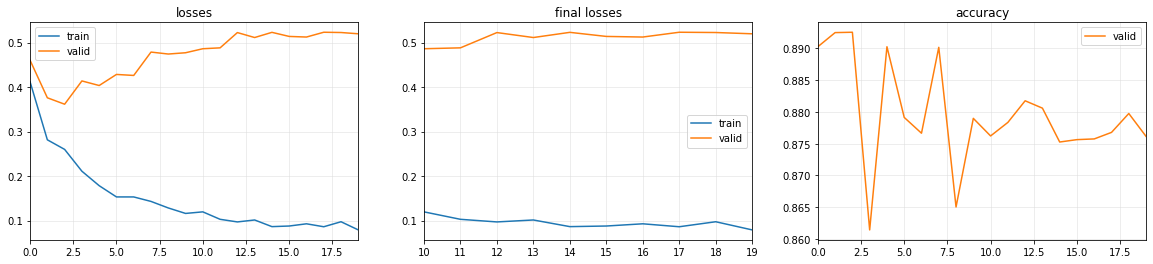

In [8]:
from tsai.all import *

splits = TimeSplitter(0.3)(y) 

batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch=InceptionTimePlus, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(20, 1e-5)
mv_clf.export("mv_clf.pkl")

In [6]:
mv_clf.cbs.index


<function list.index(value, start=0, stop=9223372036854775807, /)>

In [9]:
from tsai.inference import load_learner
mv_clf = load_learner("models/mv_clf.pkl")
x_train = X[splits[0]]
y_train = y[splits[0]]

x_test = X[splits[1]]
y_test = y[splits[1]]

probas, target, preds = mv_clf.get_X_preds(x_test, y_test)

In [8]:
x_test.shape

(428, 10, 60)

In [6]:
preds

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2',
       '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '1',
       '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '3', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '2', '3', '2', '2', '2', '2', '2', '2', '2', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [18]:
test_predict = [int(i) for i in list(preds)]

In [19]:

# test_predict = mv_clf.predict(x_test)
from sklearn import metrics

print('The accuracy of the lstm  is:',metrics.accuracy_score(y_test,test_predict))
print('The recall of the lstm  is:',metrics.recall_score(y_test,test_predict,average='macro'))
print('The f1 of the lstm  is:',metrics.f1_score(y_test,test_predict,average='macro'))
## Check Confusion Matrix (statistical matrix of predicted and true values for each scenario)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The accuracy of the lstm  is: 0.7067149686286226
The recall of the lstm  is: 0.4988875771537755
The f1 of the lstm  is: 0.4779871074790279
The confusion matrix result:
 [[33980  6631  1648]
 [ 1654  2165   740]
 [ 2752  2281  1701]]


In [20]:
import pandas as pd

df = pd.read_csv("all_model_results.csv")
for i in range(df.shape[0]):
    if df['model'].values[i] == 'lstm':
        df.loc[i,'acc'] = metrics.accuracy_score(y_test,test_predict)
        df.loc[i,'recall'] = metrics.recall_score(y_test,test_predict,average='macro')
        df.loc[i,'f1'] = metrics.f1_score(y_test,test_predict,average='macro')
        
df.to_csv("all_model_results.csv",index=False)